## Altmap Experiments
### Compare altmap to map eq using networkx


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict

plt.rcParams.update({'font.size': 14})
%pylab

%run helpers.py
# loads the following helper functions:
# infomap(net_path, altmap=False, additional_args='')
# read_tree(tree_path)
# drawNetwork(G, communities)
# altmap_cost(G, communities)
# create_initfile(G, N_partitions=None, randomized=True)


Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
epsilon = 0.15
N1 = 200
N2 = 50
N = N1 + N2
p_self = (1.0 - epsilon) / (N/2 - 1)
p_ext = 2.0 *  epsilon / N

# generate graph
G = nx.MultiGraph()
G.add_nodes_from(range(1, N+1))
for n1 in range(1, N1+1):
    for i in range(n1 + 1, N1+1):
        G.add_edge(n1, i, weight=p_self)
    
    for n2 in range(N1+1, N1+N2+1):
        G.add_edge(n1, n2, weight=p_ext)

for n2 in range(N1+1, N1+N2+1):
    for i in range(n2 + 1, N1+N2+1):
        G.add_edge(n2, i, weight=p_self)

# 2 communities
communities = {}
i = 1
for c, n in enumerate([N1, N2]):
    for a in range(1, n+1):
        communities[i] =  c + 1
        i = i + 1
        
cost = altmap_cost(G, communities)
print (f'Ground Truth 2 communities L = {cost}')
print (f'Analytical: {-1.0 - plogp(1.0-epsilon) - plogp(epsilon)}\n')

# each node a community
communities = {}
for n in range(1, N + 1):
        communities[n] = n
        
cost = altmap_cost(G, communities)
print (f'Ground Truth each node L = {cost}')
print (f'Analytical: {-np.log2(N/(N - 1))}\n')
                

Ground Truth 2 communities L = -0.13539149546531296
Analytical: -0.3901596952835996

Ground Truth each node L = -0.00612389163691027
Analytical: -0.005782352594006178



In [3]:
nx.write_pajek(G, workspace_path +  filename + '.net')
# infomap(workspace_path +  filename + '.net', altmap=False)
# infomap(workspace_path +  filename + '.net', altmap=True)
communities = create_initfile(G, randomized=True)
infomap(workspace_path +  filename + '.net', altmap=True, additional_args=' --cluster-data ./workspace/init.tree')

# read results
communities_found, num_communities_found = read_communities_from_tree_file()
print (communities_found)
print (f'We found {num_communities_found} communities.')

cost = altmap_cost(G, communities_found)
print (f'Achieved cost L = {cost}')


OrderedDict([(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15), (15, 16), (16, 17), (17, 18), (18, 19), (19, 20), (20, 21), (21, 22), (22, 23), (23, 24), (24, 25), (25, 26), (26, 27), (27, 28), (28, 29), (29, 30), (30, 31), (31, 32), (32, 33), (33, 34), (34, 35), (35, 36), (36, 37), (37, 38), (38, 39), (39, 40), (40, 41), (41, 42), (42, 43), (43, 44), (44, 45), (45, 46), (46, 47), (47, 48), (48, 49), (49, 50), (50, 51), (51, 52), (52, 53), (53, 54), (54, 55), (55, 56), (56, 57), (57, 58), (58, 59), (59, 60), (60, 61), (61, 62), (62, 63), (63, 64), (64, 65), (65, 66), (66, 67), (67, 68), (68, 69), (69, 70), (70, 71), (71, 72), (72, 73), (73, 74), (74, 75), (75, 76), (76, 77), (77, 78), (78, 79), (79, 80), (80, 81), (81, 82), (82, 83), (83, 84), (84, 85), (85, 86), (86, 87), (87, 88), (88, 89), (89, 90), (90, 91), (91, 92), (92, 93), (93, 94), (94, 95), (95, 96), (96, 97), (97, 98), (98, 99), (99, 100), (100, 101), (

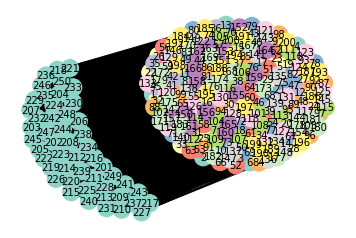

In [4]:
plt.close('all')
plt.figure()
drawNetwork(G, communities_found)